In [1]:
%pip install matplotlib
%pip install pandas
%pip install siphon
%pip install netCDF4
%pip install metpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 85.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 96.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 73.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 81.4 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 127.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 66.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 67.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 55.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 97.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
from datetime import datetime, timedelta, timezone, date
#from datetime import date, datetime, timezone
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from siphon.catalog import TDSCatalog
from metpy.units import units, pandas_dataframe_to_unit_arrays
import metpy.calc as mpcalc
from dateutil import tz

In [3]:
gfscat = ('http://thredds.ucar.edu/thredds/catalog/grib/NCEP/GFS/'
          'Global_0p5deg/catalog.xml?dataset=grib/NCEP/GFS/Global_0p5deg/Best')

#namcat = ('https://thredds.ucar.edu/thredds/catalog/grib/NCEP/RAP/CONUS_13km/catalog.xml?dataset=grib/NCEP/RAP/CONUS_13km/Best')

In [4]:
catg = TDSCatalog(gfscat)
#catg.datasets
ncss_gfs = catg.datasets[0].subset()
#ncss_gfs.variables

In [5]:
#datetime.now(timezone.utc)
'''
'Maximum_temperature_height_above_ground_Mixed_intervals_Maximum'
'Minimum_temperature_height_above_ground_Mixed_intervals_Minimum'
'Wind_speed_gust_surface'
'Temperature_surface'
'Total_cloud_cover_entire_atmosphere'
'Precipitation_rate_surface'

'High_cloud_cover_high_cloud'
'Medium_cloud_cover_middle_cloud'
'Low_cloud_cover_low_cloud'
'''

pq = ncss_gfs.query()
pq.time_range(datetime.now(timezone.utc), datetime.now(timezone.utc) + timedelta(days=7))
pq.accept('netcdf')
pq.variables('Temperature_surface','Wind_speed_gust_surface','Precipitation_rate_surface','Low_cloud_cover_low_cloud','u-component_of_wind_maximum_wind','v-component_of_wind_maximum_wind')
#point_query.variables('Maximum_temperature_height_above_ground_Mixed_intervals_Maximum','Minimum_temperature_height_above_ground_Mixed_intervals_Minimum')
pq.lonlat_point(-91.6, 41.9)
data=ncss_gfs.get_data(pq)

In [6]:
#pq = ncss_gfs.query()
#pq.time_range(datetime.now(timezone.utc), datetime.now(timezone.utc) + timedelta(days=3))
#pq.accept('netcdf')
pq.vertical_level(100000)
pq.variables('Dewpoint_temperature_height_above_ground')
pq.lonlat_point(-91.6,41.9)
dewdata=ncss_gfs.get_data(pq)

In [7]:
pq.variables('v-component_of_wind_height_above_ground','u-component_of_wind_height_above_ground')
pq.vertical_level(100000)
winddata = ncss_gfs.get_data(pq)
list(winddata.variables)

['latitude',
 'longitude',
 'stationAltitude',
 'station_id',
 'station_description',
 'u-component_of_wind_height_above_ground',
 'v-component_of_wind_height_above_ground',
 'time',
 'stationIndex']

In [8]:
tdew = units(dewdata.variables['Dewpoint_temperature_height_above_ground'].units) * dewdata.variables['Dewpoint_temperature_height_above_ground'][:]
tdew 

Magnitude,[285.56829833984375 283.15850830078125 282.95849609375 282.768310546875 283.8169860839844 286.2572326660156 286.8534240722656 287.97576904296875 288.06829833984375 286.3614807128906 285.3121032714844 284.21282958984375 285.092529296875 287.6000061035156 288.6000061035156 290.63861083984375 291.0 288.6000061035156 287.5999755859375 287.1000061035156 288.189208984375 290.5193176269531 290.21929931640625 289.9167175292969 291.5917053222656 288.7559509277344 288.02642822265625 287.4147033691406 288.7969970703125 292.314697265625 291.7930908203125 293.12420654296875 290.93634033203125 291.03631591796875 290.69512939453125 290.0 290.53167724609375 292.135009765625 293.03564453125 294.29998779296875 292.61212158203125 293.11212158203125 293.3121032714844 293.7386474609375 288.11932373046875 286.98529052734375 285.5 285.6000061035156 286.0 283.9552307128906 283.1388854980469 282.5 281.9461364746094 281.0538635253906 282.7461242675781 286.94610595703125 287.453857421875]
Units,kelvin


In [9]:
uwind = units(winddata.variables['u-component_of_wind_height_above_ground'].units) * winddata.variables['u-component_of_wind_height_above_ground'][:]
uwind = uwind.to('kt')

vwind = units(winddata.variables['v-component_of_wind_height_above_ground'].units) * winddata.variables['v-component_of_wind_height_above_ground'][:]
vwind = vwind.to('kt')

winddir = mpcalc.wind_direction(uwind,vwind)
windspd = mpcalc.wind_speed(uwind,vwind)
#winddir
windspd

Magnitude,[8.050991703595145 8.904405583275484 10.915817489155186 15.396534325210647 15.04150598074122 16.132694216583293 18.159264216842757 17.59409223446399 17.00802469229675 15.855535575934992 17.566678742765834 17.612914027493936 17.136447937948528 14.129572962119717 12.243599685213253 11.649414671219382 13.461550468257162 7.067866702908325 1.9487482226946924 4.078207369118767 1.1203808993661526 5.817436995054816 6.982738309454824 10.775448777045842 12.121877653781867 12.793931662434202 12.510134415684492 14.261421416205584 8.021358419621746 7.800461400484143 11.48337827927589 11.142017925533192 10.461341904844359 12.44418130672375 15.935712940571358 11.80755702033899 13.72253716265057 13.793698136647965 21.3030209916428 18.15285770776877 11.951409116047401 15.728022286899321 24.297561798857874 20.418669549169216 20.043133458256083 21.699929701915096 22.74915447874189 25.75136726176238 16.199427381614544 10.749689814535902 8.251255227680417 12.357291571305547 10.47977017458121 1.8037577064242798 5.565767740704069 8.61389527932863 15.96232385833652]
Units,knot


In [10]:
windgst = units(data.variables['Wind_speed_gust_surface'].units) * data.variables['Wind_speed_gust_surface'][:]
#windgst

In [11]:
n = datetime.now(timezone.utc)
r = n.astimezone(tz.gettz('America/Chicago'))
print(n.strftime("%D %I:%M %p"))
print(r.strftime("%D %I:%M %p"))

05/29/25 11:38 PM
05/29/25 06:38 PM


In [12]:
time = units('hours') * data.variables['time'][:]
time -= time[0]

In [13]:
days = [datetime.now(timezone.utc) + timedelta(hours=i.magnitude) for i in time]
#for i in time:
#    dates.append(datetime.now(timezone.utc) + timedelta(hours=i.magnitude))
dates=[]
for i in days:
    dates.append(i.astimezone(tz.gettz('America/Chicago')))

t = dates[0]
daygroups=[]
for i in dates:
    if not daygroups or i.day!=t.day:
        #print(i.strftime("%D %I:%M %p"))
        group = []
        daygroups.append(group)
    group.append(i)
    t = i
for i in daygroups:
    for x in i:
        print(x.strftime("%D %I:%M %p"))
    print("##################################",len(i))
#def is_next_day(dt_object):
#    """Checks if a datetime object is the next day."""
#    today = date.today()
#    next_day = today + timedelta(days=1)
#    return dt_object.date() == next_day

# Example usage:
#now = datetime.now()
#tomorrow = now + timedelta(days=1)
#print(is_next_day(now)) # Output: False
#print(is_next_day(tomorrow)) # Output: True

05/29/25 06:38 PM
05/29/25 09:38 PM
################################## 2
05/30/25 12:38 AM
05/30/25 03:38 AM
05/30/25 06:38 AM
05/30/25 09:38 AM
05/30/25 12:38 PM
05/30/25 03:38 PM
05/30/25 06:38 PM
05/30/25 09:38 PM
################################## 8
05/31/25 12:38 AM
05/31/25 03:38 AM
05/31/25 06:38 AM
05/31/25 09:38 AM
05/31/25 12:38 PM
05/31/25 03:38 PM
05/31/25 06:38 PM
05/31/25 09:38 PM
################################## 8
06/01/25 12:38 AM
06/01/25 03:38 AM
06/01/25 06:38 AM
06/01/25 09:38 AM
06/01/25 12:38 PM
06/01/25 03:38 PM
06/01/25 06:38 PM
06/01/25 09:38 PM
################################## 8
06/02/25 12:38 AM
06/02/25 03:38 AM
06/02/25 06:38 AM
06/02/25 09:38 AM
06/02/25 12:38 PM
06/02/25 03:38 PM
06/02/25 06:38 PM
06/02/25 09:38 PM
################################## 8
06/03/25 12:38 AM
06/03/25 03:38 AM
06/03/25 06:38 AM
06/03/25 09:38 AM
06/03/25 12:38 PM
06/03/25 03:38 PM
06/03/25 06:38 PM
06/03/25 09:38 PM
################################## 8
06/04/25 12:38 AM
06/0

In [50]:



time = units('hours') * data.variables['time'][:]
time -= time[0]
#print(time)
days = [datetime.now(timezone.utc) + timedelta(hours=i.magnitude) for i in time]
#for i in time:
#    dates.append(datetime.now(timezone.utc) + timedelta(hours=i.magnitude))
dates=[]
for i in days:
    dates.append(i.astimezone(tz.gettz('America/Chicago')))
    #print((i.astimezone(tz.gettz('America/Chicago'))).strftime("%D %I:%M %p"))
threshold = timedelta(hours=24)
groups = []
for date in dates:
    #print(date,"#############",group[0])
    print(date - group[0] > threshold)
    print(date.hour)
    '''
    if not groups or date - group[0] > threshold:
        group = []
        groups.append(group)
    group.append(date)
    '''
    if int(date.hour) <24:
        print(date)

for i in groups:
    print('###################',i[0].strftime("%D"),'###################')
    for x in i:
        #print(x.strftime("%a %d %I %p"))
        print(x.hour)


False
18
2025-05-29 18:27:15.667653-05:00
False
21
2025-05-29 21:27:15.667682-05:00
False
0
2025-05-30 00:27:15.667702-05:00
False
3
2025-05-30 03:27:15.667718-05:00
False
6
2025-05-30 06:27:15.667733-05:00
False
9
2025-05-30 09:27:15.667748-05:00
False
12
2025-05-30 12:27:15.667763-05:00
False
15
2025-05-30 15:27:15.667777-05:00
False
18
2025-05-30 18:27:15.667790-05:00
False
21
2025-05-30 21:27:15.667804-05:00
False
0
2025-05-31 00:27:15.667818-05:00
False
3
2025-05-31 03:27:15.667832-05:00
False
6
2025-05-31 06:27:15.667845-05:00
False
9
2025-05-31 09:27:15.667861-05:00
False
12
2025-05-31 12:27:15.667875-05:00
False
15
2025-05-31 15:27:15.667888-05:00
False
18
2025-05-31 18:27:15.667901-05:00
False
21
2025-05-31 21:27:15.667915-05:00
False
0
2025-06-01 00:27:15.667929-05:00
False
3
2025-06-01 03:27:15.667942-05:00
False
6
2025-06-01 06:27:15.667955-05:00
False
9
2025-06-01 09:27:15.667969-05:00
False
12
2025-06-01 12:27:15.667982-05:00
False
15
2025-06-01 15:27:15.667995-05:00
Fals

In [49]:
temp = (units(data.variables['Temperature_surface'].units) * data.variables['Temperature_surface'][:]).to('degF')
#temp = pointdat.variables['Temperature_surface'][:]
#print(temp[0])

h = 0
#idx = [i i+=1 for x in range(len(temp))]
idx = []
for x in range(len(temp)):
#    print(i)
    idx.append(h)
    h+=1
#for i in temp:
#    print(i)
tempmax = np.nanmax(temp)
#tempmax
for i in idx:
    print(temp[i])


62.07528198242185 degree_Fahrenheit
51.60470703124997 degree_Fahrenheit
50.46201904296873 degree_Fahrenheit
49.61590698242185 degree_Fahrenheit
54.05504272460935 degree_Fahrenheit
68.36248291015623 degree_Fahrenheit
75.82999999999997 degree_Fahrenheit
76.46253784179684 degree_Fahrenheit
67.86436279296872 degree_Fahrenheit
58.2640148925781 degree_Fahrenheit
56.0403820800781 degree_Fahrenheit
57.56413085937498 degree_Fahrenheit
58.29757812499997 degree_Fahrenheit
72.27185791015623 degree_Fahrenheit
80.1795422363281 degree_Fahrenheit
72.64660156249998 degree_Fahrenheit
68.62999999999998 degree_Fahrenheit
59.75623291015623 degree_Fahrenheit
57.382197265624974 degree_Fahrenheit
56.3717297363281 degree_Fahrenheit
63.356892089843726 degree_Fahrenheit
76.1717297363281 degree_Fahrenheit
80.77066162109372 degree_Fahrenheit
82.23755615234373 degree_Fahrenheit
73.5303967285156 degree_Fahrenheit
68.57100341796873 degree_Fahrenheit
67.1857922363281 degree_Fahrenheit
66.24387939453122 degree_Fahrenhe

In [50]:
for i in daygroups:
    #print(len(i))
    for a,b in zip(i,idx):
        print(a.strftime("%D %I:%M %p"))
        print(b)
    #for x in range(len(i)):
        #print(temp[x])
     #   print(x)
    print('######################')
#    for x in temps:
#        print(len(x))

#for i in daygroups:
#    for x in i:
#        print(x.strftime("%D %I:%M %p"))
#    print("##################################",len(i))

05/29/25 06:38 PM
0
05/29/25 09:38 PM
1
######################
05/30/25 12:38 AM
0
05/30/25 03:38 AM
1
05/30/25 06:38 AM
2
05/30/25 09:38 AM
3
05/30/25 12:38 PM
4
05/30/25 03:38 PM
5
05/30/25 06:38 PM
6
05/30/25 09:38 PM
7
######################
05/31/25 12:38 AM
0
05/31/25 03:38 AM
1
05/31/25 06:38 AM
2
05/31/25 09:38 AM
3
05/31/25 12:38 PM
4
05/31/25 03:38 PM
5
05/31/25 06:38 PM
6
05/31/25 09:38 PM
7
######################
06/01/25 12:38 AM
0
06/01/25 03:38 AM
1
06/01/25 06:38 AM
2
06/01/25 09:38 AM
3
06/01/25 12:38 PM
4
06/01/25 03:38 PM
5
06/01/25 06:38 PM
6
06/01/25 09:38 PM
7
######################
06/02/25 12:38 AM
0
06/02/25 03:38 AM
1
06/02/25 06:38 AM
2
06/02/25 09:38 AM
3
06/02/25 12:38 PM
4
06/02/25 03:38 PM
5
06/02/25 06:38 PM
6
06/02/25 09:38 PM
7
######################
06/03/25 12:38 AM
0
06/03/25 03:38 AM
1
06/03/25 06:38 AM
2
06/03/25 09:38 AM
3
06/03/25 12:38 PM
4
06/03/25 03:38 PM
5
06/03/25 06:38 PM
6
06/03/25 09:38 PM
7
######################
06/04/25 12:38 AM
0
06

In [16]:
qpfunit = units('kg / m^2 / s')
qpfdat = data.variables['Precipitation_rate_surface'][:].squeeze()
qpfwithunits = qpfunit * data.variables['Precipitation_rate_surface'][:].squeeze()
density_water = units('kg / m^3') * 1000.
qpf = (qpfwithunits / density_water).to('inches / hour')


#qpf = units(pointdat.variables['Precipitation_rate_surface'].units) * pointdat.variables['Precipitation_rate_surface'][:]
#for i in qpf:
#    print(i)


In [60]:
myunits = {'Low_cloud_cover_low_cloud':'percent','Temperature_surface':'degK','Precipitation_rate_surface':'kg m^-2 s^-1','Wind_speed_gust_surface':'meter_per_second'}
md = pandas_dataframe_to_unit_arrays(df, column_units=myunits) #kg m^-2 s^-1

NameError: name 'df' is not defined

In [68]:
md.keys()

dict_keys(['time', 'station', 'latitude', 'longitude', 'Low_cloud_cover_low_cloud', 'Temperature_surface', 'Precipitation_rate_surface', 'Wind_speed_gust_surface'])

In [18]:
hours = np.arange(len(data['time'][:]))*3
hours
cntr = hours*0
hours

array([  0,   3,   6,   9,  12,  15,  18,  21,  24,  27,  30,  33,  36,
        39,  42,  45,  48,  51,  54,  57,  60,  63,  66,  69,  72,  75,
        78,  81,  84,  87,  90,  93,  96,  99, 102, 105, 108, 111, 114,
       117, 120, 123, 126, 129, 132, 135, 138, 141, 144, 147, 150, 153,
       156, 159, 162, 165, 168])

In [19]:
#windgst = units(data.variables['Wind_speed_gust_surface'].units) * data.variables['Wind_speed_gust_surface'][:]
w=[]
for i in windgst.to('kt'):
    #print(round(float(i.magnitude)))
    w.append(round(float(i.magnitude)))
#w

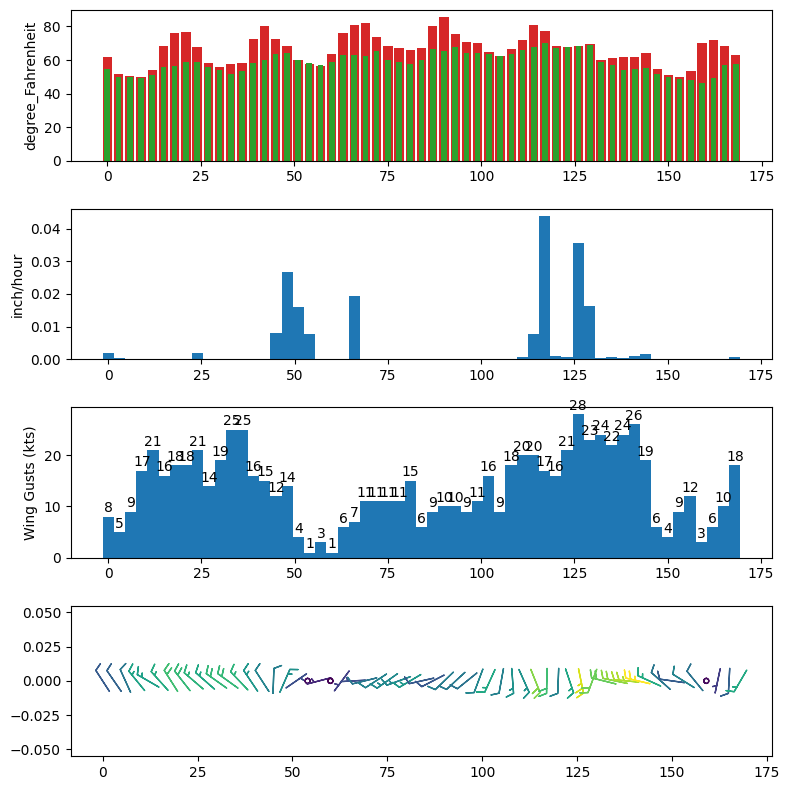

In [20]:
def add_labels(x, y):
    for i in range(len(x)):
        fig.text(i, y[i], y[i], ha='center')


fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4,figsize=(8, 8))
ax1.bar(hours, temp.to('degF'), color='tab:red',align='center', width=2.5)
ax1.bar(hours, tdew.to('degF'), color='tab:green',align='center', width=1.5)
ax2.bar(hours, qpf, width=3)
#ax3.bar(hours, windgst.to('kt'), width=3)
#add_labels(hours, windgst.to('kt'))
bar_container = ax3.bar(hours, w, width=3)
ax3.bar_label(bar_container, label_type='edge',padding=1)
ax3.set_ylabel("Wing Gusts (kts)")#,fmt='{:,.0f}')
#ax3.bar_label(p, label_type='center')
#ax3.bar_label(windgst.to('kt'), label_type='center', padding=5, fmt='%.1f', rotation=45)
#ax3.text(hours, windgst.to('kt'), windgst.to('kt'), ha='center')
#ax3.barbs(hours,windgst,uwind,vwind)
ax4.barbs(hours,cntr,uwind,vwind,np.sqrt(uwind ** 2 + vwind ** 2),pivot='middle',sizes=dict(emptybarb=0.1, spacing=0.2, height=0.3),length=6,)
fig.tight_layout()



#    X, Y, U, V, np.sqrt(U ** 2 + V ** 2), fill_empty=True, rounding=False,